In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["font.family"] = "Verdana"

In [59]:
def plot_performance_metrics_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name)

                # Annotate max value
        max_val = df['Value'].max()
        max_step = df[df['Value'] == max_val]['Step'].values[0]
        plt.annotate(f'{max_val:.2f}', (max_step, max_val), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Inverse Average Bounded Slowdown')
    plt.legend()
    plt.title('HPC2N Validation Performance Log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

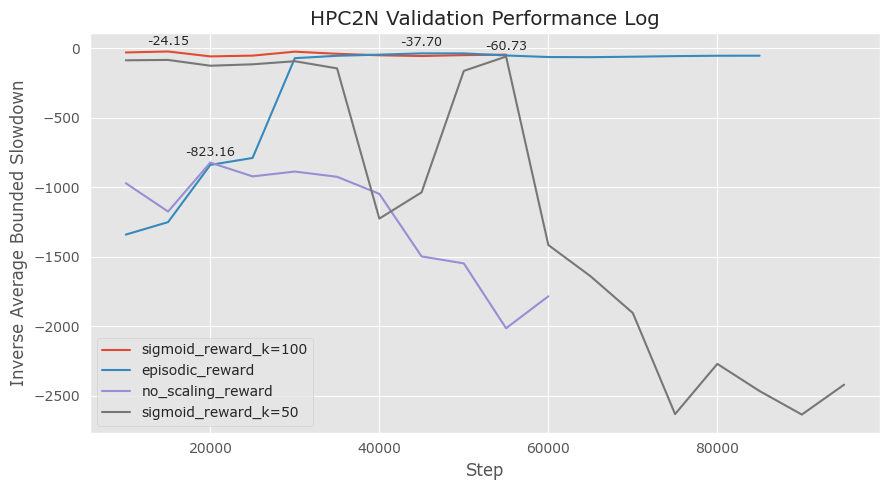

In [60]:
# Usage
directory_path = "./csv_logs/stage-1/performance-metric"  # Replace with your directory path
plot_performance_metrics_from_csv(directory_path)

In [61]:
def smooth(scalars, weight = 0.5):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

def plot_explained_variance_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name, alpha=0.8)

        # Plot the smoothed data
        smoothed_values = smooth(df['Value'], weight=0.5)
        plt.plot(df['Step'], smoothed_values, label=f"{label_name} 0.5-exponential MA", alpha=0.3)

                # Annotate max value
        max_val = df['Value'].max()
        max_step = df[df['Value'] == max_val]['Step'].values[0]
        plt.annotate(f'{max_val:.2f}', (max_step, max_val), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Explained Variance')
    plt.legend()
    plt.title('HPC2N Training Explained Variance Log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

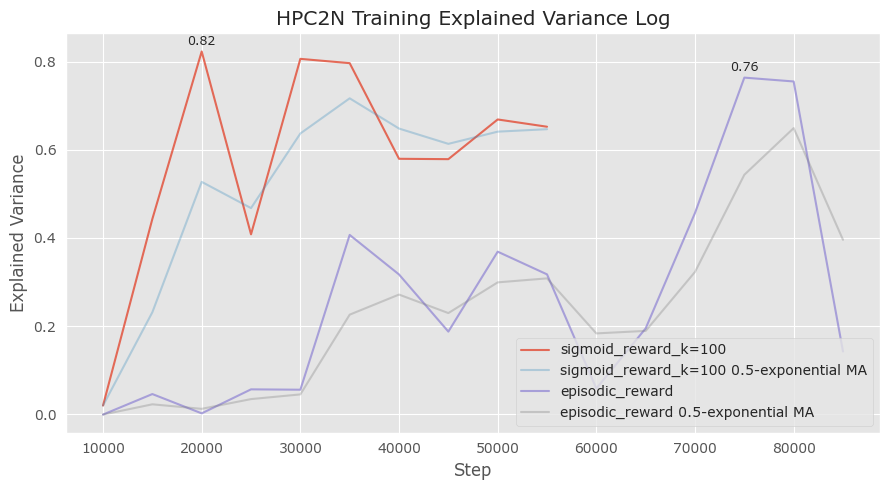

In [62]:
# Usage
directory_path = "./csv_logs/stage-1/explained_variance"
plot_explained_variance_from_csv(directory_path)